<a href="https://colab.research.google.com/github/pallapreethi/Palla-Preethi-/blob/master/Health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Health /health insurance ')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Health /health insurance ')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [ ]:
def num_plot(x,c='g'):
  plt.figure(figsize=(16,8))
  sns.displot(df[x],color=c)
  plt.show()
  print(10*'-----',x,10*'-----')
  print('min:',df[x].min())
  print('max:',df[x].max())
  print('mean:',df[x].mean())

<Figure size 1152x576 with 0 Axes>

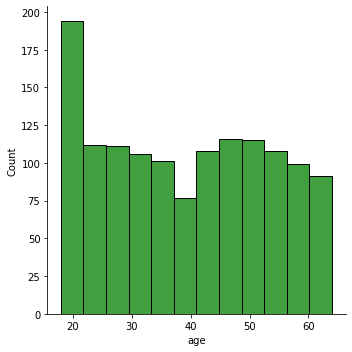

-------------------------------------------------- age --------------------------------------------------
min: 18
max: 64
mean: 39.20702541106129


In [ ]:
num_plot('age')

<Figure size 1152x576 with 0 Axes>

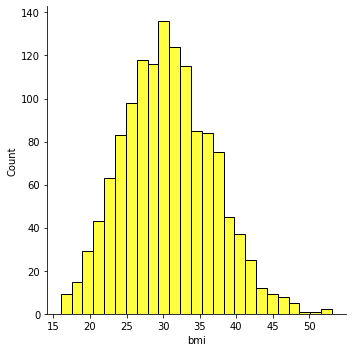

-------------------------------------------------- bmi --------------------------------------------------
min: 16.0
max: 53.1
mean: 30.665470852017993


In [ ]:
num_plot('bmi','yellow')

<Figure size 1152x576 with 0 Axes>

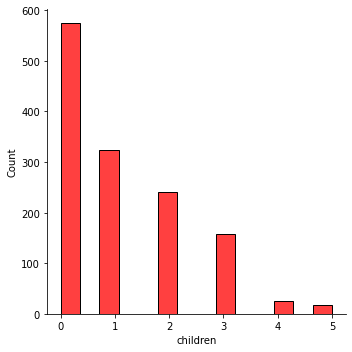

-------------------------------------------------- children --------------------------------------------------
min: 0
max: 5
mean: 1.0949177877429


In [ ]:
num_plot('children','red')

<Figure size 1152x576 with 0 Axes>

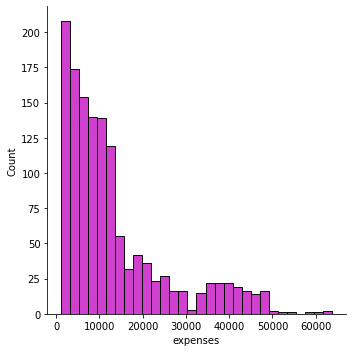

-------------------------------------------------- expenses --------------------------------------------------
min: 1121.87
max: 63770.43
mean: 13270.422414050803


In [ ]:
num_plot('expenses',c='m')

In [ ]:
def cat_plot(x):
  plt.figure(figsize=(16,8))
  sns.countplot(df[x])
  plt.show()
  print(df[x].value_counts(normalize=True))
  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


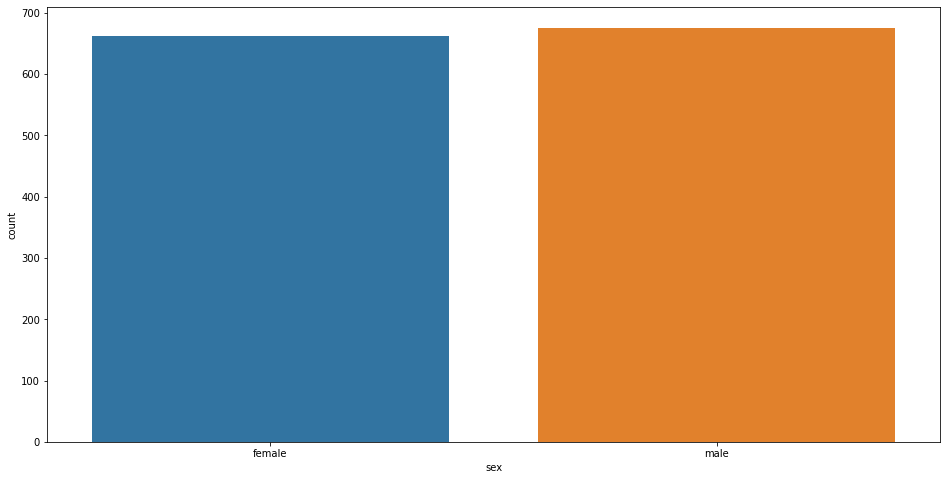

male      0.505232
female    0.494768
Name: sex, dtype: float64


In [ ]:
 cat_plot('sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


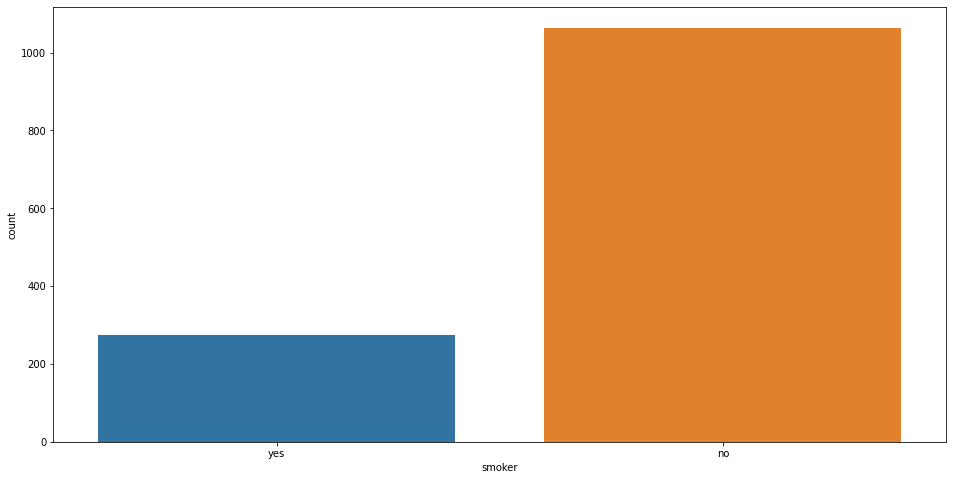

no     0.795217
yes    0.204783
Name: smoker, dtype: float64


In [ ]:
cat_plot('smoker')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


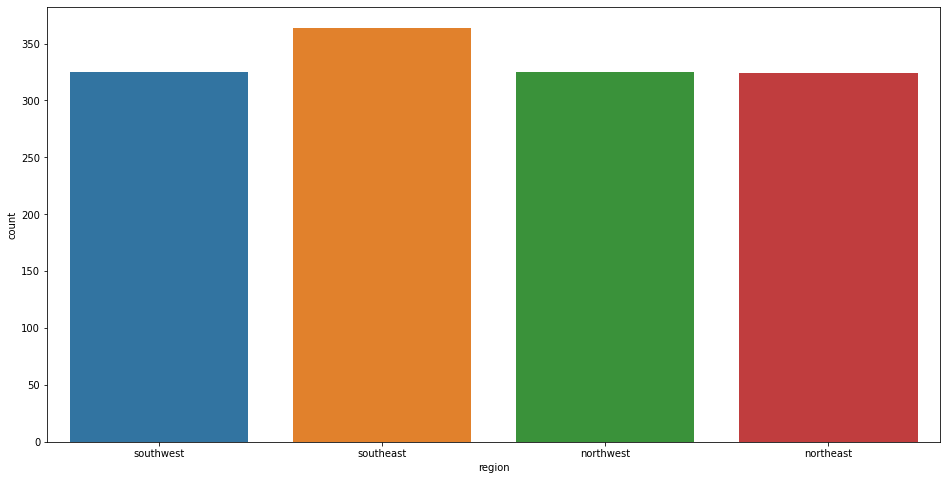

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


In [ ]:
cat_plot('region')

# New Section

In [ ]:
ideal_bm=df[(df['bmi']>18)&(df['bmi']<=25)]
ideal_bm

,age,sex,bmi,children,smoker,region,expenses
3,33,male,22.7,0,no,northwest,21984.47
15,19,male,24.6,1,no,southwest,1837.24
17,23,male,23.8,0,no,northeast,2395.17
26,63,female,23.1,0,no,northeast,14451.84
35,19,male,20.4,0,no,northwest,1625.43
...,...,...,...,...,...,...,...
1304,42,male,24.6,2,yes,northeast,21259.38
1306,29,female,21.9,0,yes,northeast,16115.30
1314,30,female,23.7,3,yes,northwest,18765.88
1316,19,female,20.6,0,no,southwest,1731.68


Converting to Numerical

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [ ]:
df=pd.concat([df,gender],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,expenses,gender_male
0,19,female,27.9,0,yes,southwest,16884.92,0
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,1
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,1


In [ ]:
lb_smkr=LabelEncoder()
smoker=lb_smkr.fit_transform(df['smoker'])

In [ ]:
df['smoker']=smoker

In [ ]:
lb_smkr.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
lb_region=LabelEncoder()
region=lb_region.fit_transform(df['region'])

In [ ]:
df['region']=region

In [ ]:
lb_region.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,gender_male
0,19,female,27.9,0,1,3,16884.92,0
1,18,male,33.8,1,0,2,1725.55,1
2,28,male,33.0,3,0,2,4449.46,1
3,33,male,22.7,0,0,1,21984.47,1
4,32,male,28.9,0,0,1,3866.86,1


In [ ]:
df.drop('sex',axis=1,inplace=True)

In [ ]:
df.head()

,age,bmi,children,smoker,region,expenses,gender_male
0,19,27.9,0,1,3,16884.92,0
1,18,33.8,1,0,2,1725.55,1
2,28,33.0,3,0,2,4449.46,1
3,33,22.7,0,0,1,21984.47,1
4,32,28.9,0,0,1,3866.86,1


In [ ]:
x=df.drop('expenses',axis=1).values
y=df['expenses'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearfrom sklearn.linear_model import LinearRegression
n.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split

SyntaxError: ignored

In [ ]:
std=StandardScaler()
x=std.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=89)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

In [ ]:
np.sqrt(mse)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
df.head()